In [2]:
import os, sys
sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), '..')))  # notebooks → code



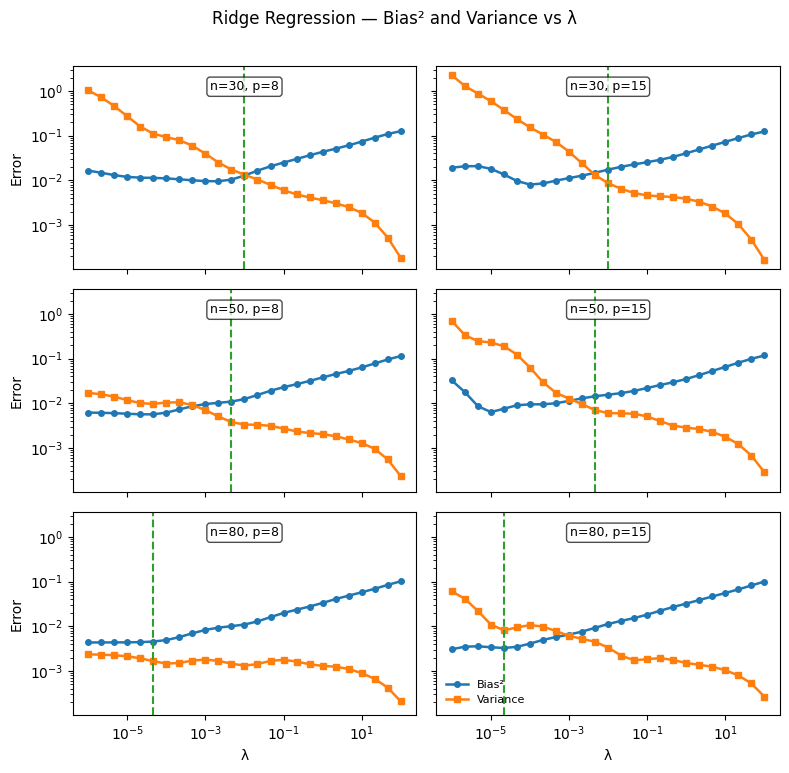

In [10]:
import os
import numpy as np
import matplotlib.pyplot as plt

from src.data import runge_function, equispaced_points
from src.basis import vandermonde
from src.regression import ridge_svd
from src.bias_variance import compute_bias_variance

# -------------------
# Config
# -------------------
rng = np.random.default_rng(314)
lambdas = np.logspace(-6, 2, 25)
n_list, p_list = [30, 50, 80], [8, 15]
noise_std, trials = 0.1, 500
xg = np.linspace(-1, 1, 400)
yg = runge_function(xg)

# -------------------
# Bias–Variance Curves
# -------------------
fig, axes = plt.subplots(len(n_list), len(p_list), figsize=(8, 8), sharex=True, sharey=True)
axes = axes.ravel()

for idx, (n, p) in enumerate([(n, p) for n in n_list for p in p_list]):
    ax = axes[idx]
    x = equispaced_points(n)
    y = runge_function(x) + rng.normal(0, noise_std, size=n)

    bias2_list, var_list, tot_list = [], [], []
    for lam in lambdas:
        b2, v, t = compute_bias_variance(x, y, xg, yg, [p], ridge_svd,
                                         trials=trials, seed=314, alpha=lam)
        bias2_list.append(b2[0])
        var_list.append(v[0])
        tot_list.append(t[0])

    opt_idx = np.argmin(tot_list)
    opt_lambda = lambdas[opt_idx]

    # --- Style: subtle, clean, no grid, proper linewidths ---
    ax.loglog(lambdas, bias2_list, 'o-', label='Bias²', color='C0', linewidth=1.8, markersize=4)
    ax.loglog(lambdas, var_list, 's-', label='Variance', color='C1', linewidth=1.8, markersize=4)
    ax.axvline(opt_lambda, color='C2', linestyle='--', linewidth=1.5)

    ax.text(0.5, 0.93, f'n={n}, p={p}', transform=ax.transAxes,
            fontsize=9, ha='center', va='top',
            bbox=dict(boxstyle='round,pad=0.25', facecolor='white', alpha=0.7))

    ax.set_axisbelow(True)
    ax.grid(False)

    if idx >= len(p_list)*(len(n_list)-1):
        ax.set_xlabel('λ', fontsize=10)
    if idx % len(p_list) == 0:
        ax.set_ylabel('Error', fontsize=10)

axes[-1].legend(frameon=False, fontsize=8, loc='lower left')
fig.suptitle('Ridge Regression — Bias² and Variance vs λ', fontsize=12, y=0.96)
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Save
fig_dir = os.path.abspath(os.path.join(os.getcwd(), '..', 'figures'))
os.makedirs(fig_dir, exist_ok=True)
fig.savefig(os.path.join(fig_dir, 'ridge_bias_variance_curves.pdf'), bbox_inches='tight')
plt.show()
